1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import linalg as la
import seaborn as sns

In [18]:
N = 1000
x1 = np.random.normal(loc=0, scale=1, size=N)
x2 = x1 + np.random.normal(loc=0, scale=3, size=N)
x3 = 2*x1 + x2

x = np.array([x1, x2, x3])
print(x)

[[-0.2377063  -0.505737    2.56729864 ... -0.91027067  1.14191899
   0.82984454]
 [ 1.24945859  0.19694449  0.07989354 ...  2.2161895   1.98923597
  -1.78069185]
 [ 0.77404599 -0.81452951  5.21449081 ...  0.39564816  4.27307394
  -0.12100276]]


In [22]:
#covariance
np_cov = np.cov(x)

#Find the eigenvectors and eigenvalues using the eigendecomposition
l, V = la.eig(np_cov)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')


Eigenvalues:
 [ 2.66930806e+01+0.j -1.57098545e-15+0.j  1.91525381e+00+0.j] 

Eigenvectors:
 [[-0.12380559 -0.81649658  0.56391977]
 [-0.56685226 -0.40824829 -0.71555003]
 [-0.81446344  0.40824829  0.41228952]] 



In [24]:
#Find the eigenvectors and eigenvalues using the SVD
#perform the SVD
U, s, Vt = la.svd(np_cov)

print("Spectrum:\n", s, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')


Spectrum:
 [2.66930806e+01 1.91525381e+00 5.34317445e-16] 

U:
 [[-0.12380559  0.56391977 -0.81649658]
 [-0.56685226 -0.71555003 -0.40824829]
 [-0.81446344  0.41228952  0.40824829]] 

V^T:
 [[-0.12380559 -0.56685226 -0.81446344]
 [ 0.56391977 -0.71555003  0.41228952]
 [ 0.81649658  0.40824829 -0.40824829]] 



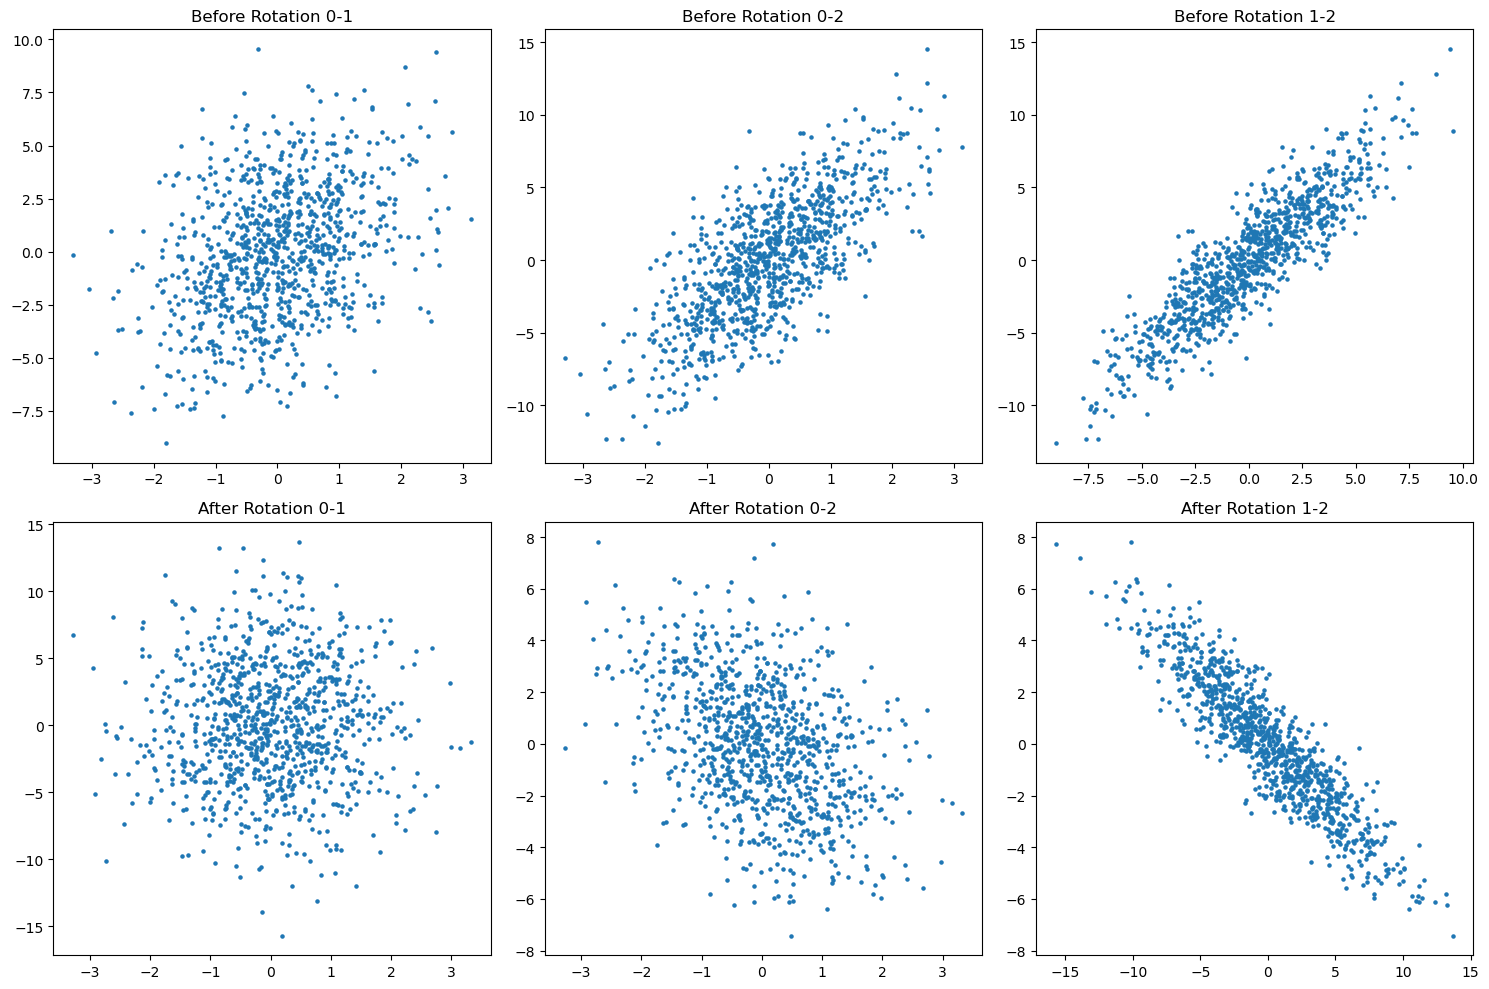

In [29]:
#plotting
xp = np.dot(V, x)
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

[[ax01, ax02, ax12],[ax_01, ax_02, ax_12]] = axes
#print the graphs
ax01.scatter(x[0], x[1], s = 5)
ax01.set_title('Before Rotation 0-1')
ax02.scatter(x[0], x[2], s = 5)
ax02.set_title('Before Rotation 0-2')
ax12.scatter(x[1], x[2], s = 5)
ax12.set_title('Before Rotation 1-2')
ax_01.scatter(xp[0], xp[1], s = 5)
ax_01.set_title('After Rotation 0-1')
ax_02.scatter(xp[0], xp[2], s = 5)
ax_02.set_title('After Rotation 0-2')
ax_12.scatter(xp[1], xp[2], s = 5)
ax_12.set_title('After Rotation 1-2')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [31]:
#giving variables
noises = np.random.normal(loc=0, scale=1/50, size=(3, N, 10))
x_noise = x + np.sum(noises, axis = 2)

#Reducind dimension using PCA
#the covariance matrix
cov1 = np.cov(x_noise)
print("Covariance matrix:\n", cov1, '\n')
l1, V1 = la.eig(cov1)
l1 = np.real_if_close(l1)

U1, s1, Vt1 = la.svd(x_noise)
l_svd1 = s1**2 / (N-1)
V_svd1 = U1

print("Eigenvalues:\n", l1, '\n')
print("Eigenvectors:\n", V1, '\n')
print('\nWith SVD:\nEigenvalues:\n',l_svd1)
print('Eigenvectors:\n', V_svd1)


Covariance matrix:
 [[ 1.02140116  1.10920107  3.14546418]
 [ 1.10920107  9.56815898 11.7651329 ]
 [ 3.14546418 11.7651329  18.04498844]] 

Eigenvalues:
 [2.67137666e+01 3.89824568e-03 1.91688377e+00] 

Eigenvectors:
 [[-0.12417801 -0.81730648  0.56266325]
 [-0.56686471 -0.40697555 -0.71626482]
 [-0.81439807  0.40789829  0.41276479]] 


With SVD:
Eigenvalues:
 [2.67242675e+01 1.91689114e+00 3.89838019e-03]
Eigenvectors:
 [[-0.12418548  0.56266228 -0.81730602]
 [-0.56685725 -0.71627097 -0.40697513]
 [-0.81440213  0.41275544  0.40789965]]


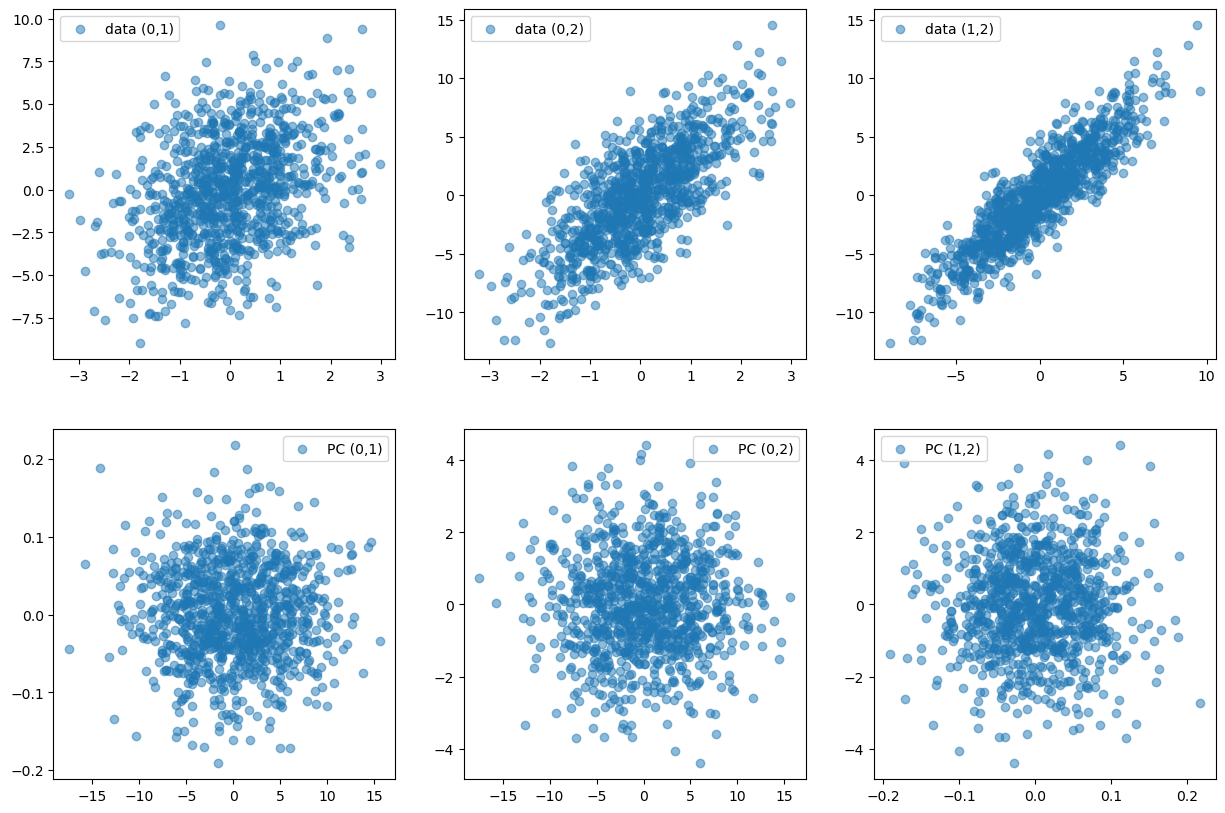

In [33]:
# plotting
Xp1 = np.dot(V1.T, x_noise)
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

axs[0,0].scatter(x_noise[0,:], x_noise[1,:], alpha=0.5, label='data (0,1)')
axs[0,0].legend()
axs[0,1].scatter(x_noise[0,:], x_noise[2,:], alpha=0.5, label='data (0,2)')
axs[0,1].legend()
axs[0,2].scatter(x_noise[1,:], x_noise[2,:], alpha=0.5, label='data (1,2)')
axs[0,2].legend()
axs[1,0].scatter(Xp1[0,:], Xp1[1,:], alpha=0.5, label='PC (0,1)')
axs[1,0].legend()
axs[1,1].scatter(Xp1[0,:], Xp1[2,:], alpha=0.5, label='PC (0,2)')
axs[1,1].legend()
axs[1,2].scatter(Xp1[1,:], Xp1[2,:], alpha=0.5, label='PC (1,2)')
axs[1,2].legend()

plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 